# Importing Libraries

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
my_dataframe = pd.read_csv("recs2009_public.csv")
my_dataframe.head()



C:\Users\PC\AppData\Local\Temp\ipykernel_3204\1972675186.py:12: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  my_dataframe = pd.read_csv("recs2009_public.csv")


,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


# Preprocess the dataset

In [11]:
# Print the number of attributes and instances in the dataset
print("Shape of the Dataset:")
print(my_dataframe.shape)


Shape of the Dataset:
(12083, 940)


In [12]:
print("First few rows of the dataset:")
print(my_dataframe.head())


First few rows of the dataset:
   DOEID  REGIONC  DIVISION  REPORTABLE_DOMAIN  TYPEHUQ   NWEIGHT  HDD65  \
0      1        2         4                 12        2   2471.68   4742   
1      2        4        10                 26        2   8599.17   2662   
2      3        1         1                  1        5   8969.92   6233   
3      4        2         3                  7        2  18003.64   6034   
4      5        1         1                  1        3   5999.61   5388   

   CDD65  HDD30YR  CDD30YR  ...  SCALEKER  IECC_Climate_Pub HDD50 CDD80  \
0   1080     4953     1271  ...        -2                4A  2117    56   
1    199     2688      143  ...        -2                3C    62    26   
2    505     5741      829  ...        -2                5A  2346    49   
3    672     5781      868  ...        -2                5A  2746     0   
4    702     5313      797  ...        -2                5A  2251     0   

   GND_HDD65   WSF  OA_LAT  GWT  DesignDBT99  DesignDBT1  
0 

In [13]:
print("Data types of each column:")
print(my_dataframe.dtypes)


Data types of each column:
DOEID                  int64
REGIONC                int64
DIVISION               int64
REPORTABLE_DOMAIN      int64
TYPEHUQ                int64
                      ...   
WSF                  float64
OA_LAT                 int64
GWT                    int64
DesignDBT99            int64
DesignDBT1             int64
Length: 940, dtype: object


In [29]:
# Select relevant features and target variable
features = my_dataframe[['YEARMADE', 'TOTROOMS', 'KWH', 'HDD65']]
target = my_dataframe['TOTALBTU']


# Print the selected features and target
print("Selected Features:")
print(features.head())

print("\nTarget Variable:")
print(target.head())


Selected Features:
   YEARMADE  TOTROOMS    KWH  HDD65
0      2004         9  18466   4742
1      1998         4   5148   2662
2      1965         2   2218   6233
3      1985         7  10015   6034
4      1983         5   2869   5388

Target Variable:
0     63006
1    103460
2     58716
3     76401
4     59809
Name: TOTALBTU, dtype: int64


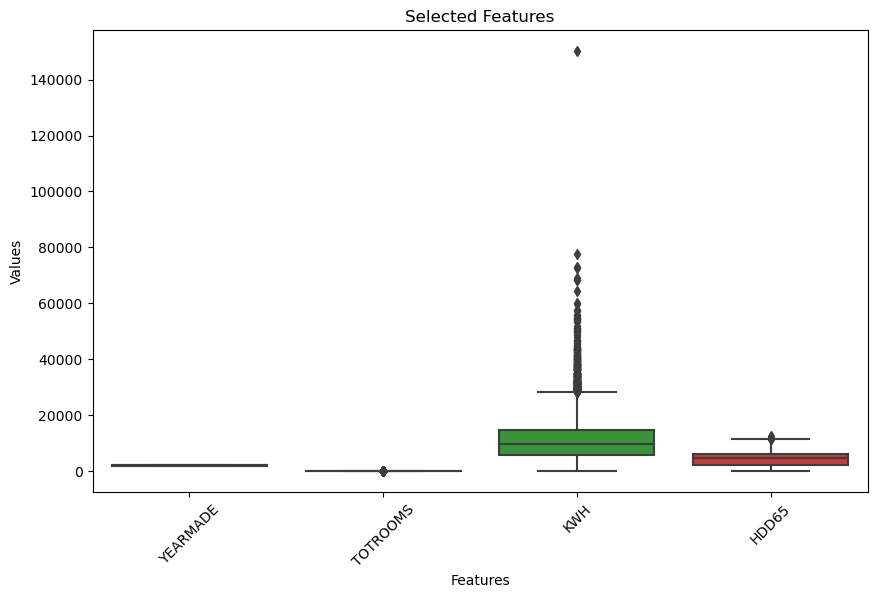

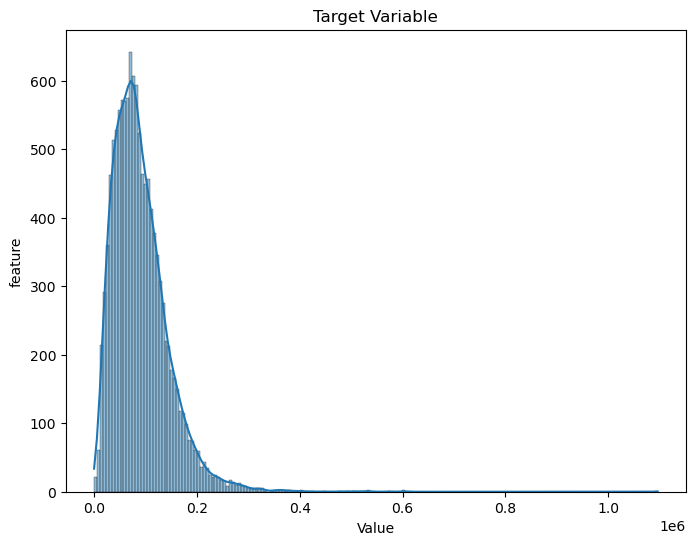

In [28]:
# Handling missing values
# using pandas library, to fill the missing values in feature with column means
features = features.fillna(features.mean()) 
# And filling the missing values in target with target mean
target = target.fillna(target.mean())

# Visualizing selected features
plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title('Selected Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Visualizing target variable
plt.figure(figsize=(8, 6))
sns.histplot(target, kde=True)
plt.title('Target Variable')
plt.xlabel('Value')
plt.ylabel('feature')
plt.show()


Threshold for Classification: 89995.69560539602


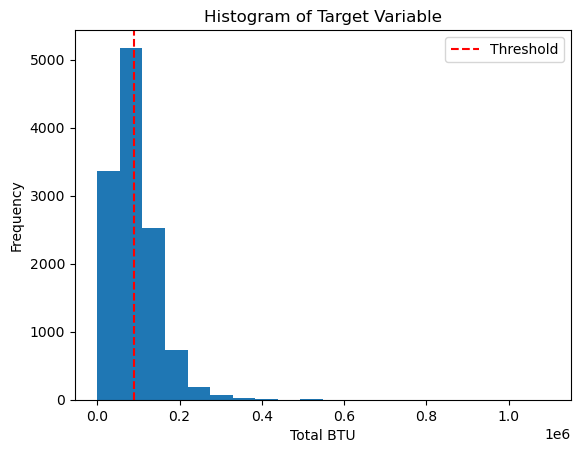

In [30]:
# Convert regression problem to classification problem
threshold = target.mean()

#  define the threshold for classification.

#print the threshold classification number.
print("Threshold for Classification:", threshold)

# Plotting histogram of the target variable
plt.hist(target, bins=20)
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Total BTU')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.legend()
plt.show()


Label Distribution:
0    6951
1    5132
Name: TOTALBTU, dtype: int64


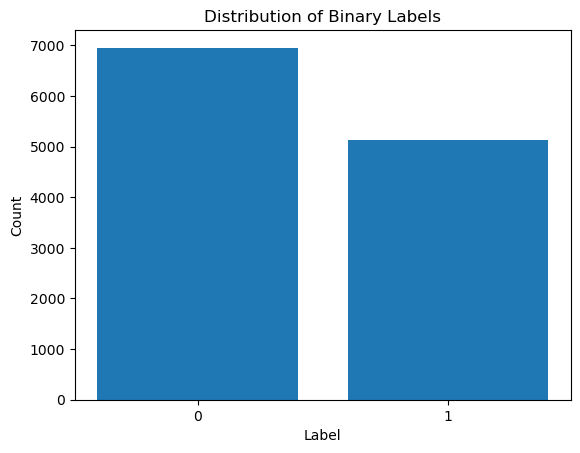

In [31]:
# Creating binary labels based on the threshold
labels = (target >= threshold).astype(int)

# the counts of each label
print("Label Distribution:")
print(labels.value_counts())

# Plotting bar chart of label distribution
plt.bar(labels.value_counts().index, labels.value_counts().values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Binary Labels')
plt.xticks([0, 1])
plt.show()


Training set shape: (9666, 4) (9666,)
Testing set shape: (2417, 4) (2417,)


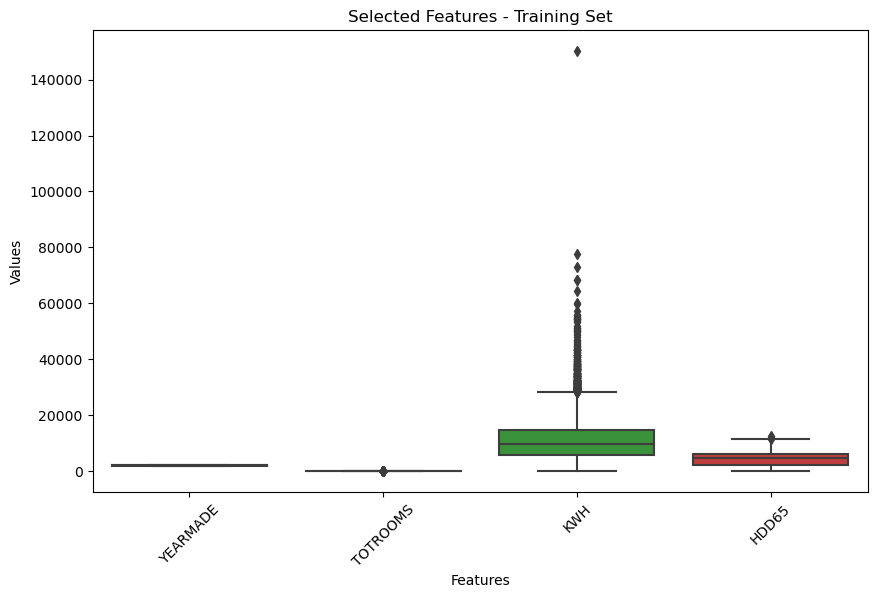

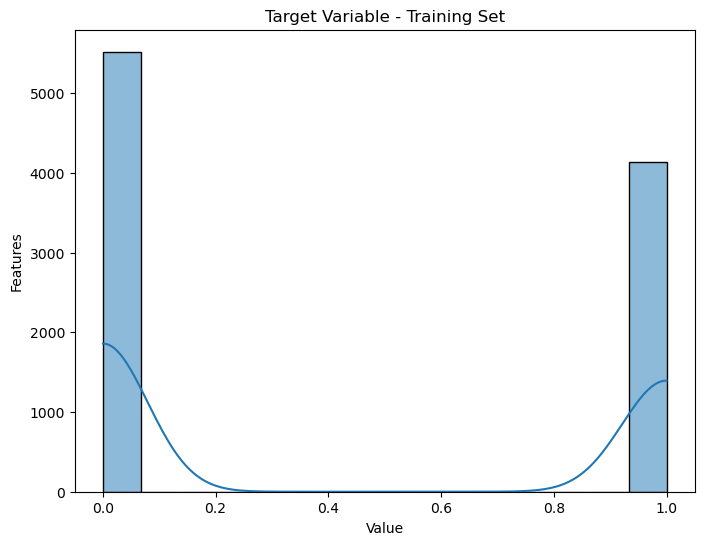

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Printing the shape of training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Visualizing selected features
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train)
plt.title('Selected Features - Training Set')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Visualizing target variable
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Target Variable - Training Set')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()


# Model 1: Logistic Regression

In [46]:
# Model 1: Logistic Regression
# Using sklearn.linear model improting logisticRegression 
# i trained a Logistic Regression model, made predictions on the test set, and calculated accuracy,
# F1 score, and AUC (Area Under the Curve) for evaluation.

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
lr_auc = roc_auc_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression F1 Score:", lr_f1)
print("Logistic Regression AUC:", lr_auc)


Logistic Regression Accuracy: 0.7699627637567232
Logistic Regression F1 Score: 0.7055084745762712
Logistic Regression AUC: 0.7551211080994581


# Model 2: Random Forest Classifier

In [47]:
# Model 2: Random Forest Classifier
# using sklearn.ensemble and sklearn.metrics, by importing the necessary libraries
# (RandomForestClassifier, accuracy_score, f1_score, roc_auc_score) 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier F1 Score:", rf_f1)
print("Random Forest Classifier AUC:", rf_auc)


Random Forest Classifier Accuracy: 0.7819611088125775
Random Forest Classifier F1 Score: 0.7323514474352463
Random Forest Classifier AUC: 0.7738233311524813


# Model 3: Support Vector Classifier

In [48]:
# Model 3: Support Vector Classifier
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)
svc_auc = roc_auc_score(y_test, svc_predictions)
print("Support Vector Classifier Accuracy:", svc_accuracy)
print("Support Vector Classifier F1 Score:", svc_f1)
print("Support Vector Classifier AUC:", svc_auc)



Support Vector Classifier Accuracy: 0.7157633429871741
Support Vector Classifier F1 Score: 0.6434872859366892
Support Vector Classifier AUC: 0.7021033893840651


# Plotting the ROC curve

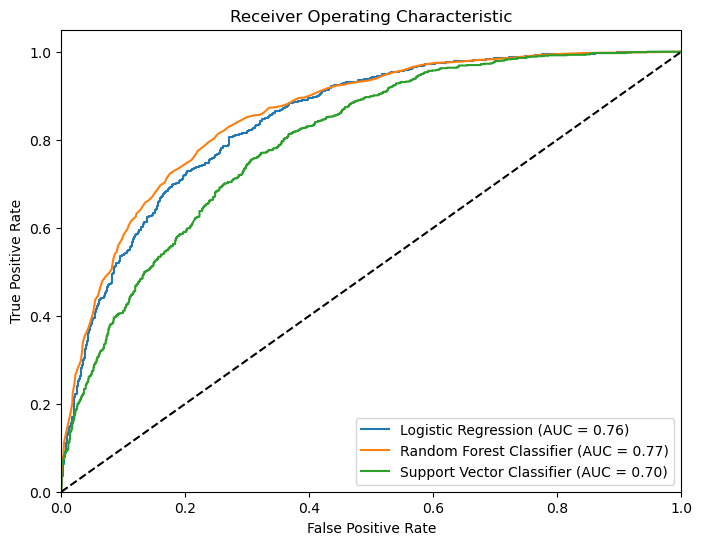

In [49]:
# Plotting the ROC curve
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
svc_probs = svc_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_auc))

fpr, tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr, label='Random Forest Classifier (AUC = {:.2f})'.format(rf_auc))

fpr, tpr, _ = roc_curve(y_test, svc_probs)
plt.plot(fpr, tpr, label='Support Vector Classifier (AUC = {:.2f})'.format(svc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



# Plotting the confusion matrix (LR)

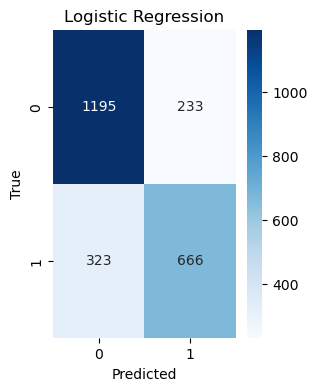

In [54]:
# Plotting the confusion matrix
lr_cm = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting the confusion matrix (RFC)

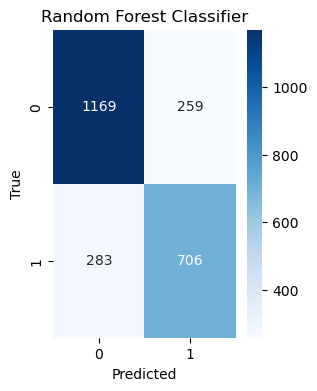

In [44]:
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 2)
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Plotting the confusion matrix (SVC)

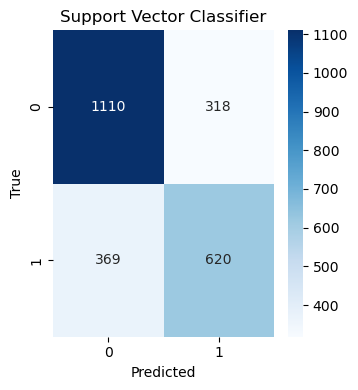

In [43]:
svc_cm = confusion_matrix(y_test, svc_predictions)
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 3)
sns.heatmap(svc_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()